<a href="https://colab.research.google.com/github/Khislatz/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Khislat_Zhuraeva_LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [4]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-01-22 19:19:43--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.14.142
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.14.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’

instacart_online_gr 100%[===================>] 196.03M  32.0MB/s    in 6.5s    

2020-01-22 19:19:50 (30.0 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’ saved [205548478/205548478]



In [5]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [6]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


"%" changes directories into this instacart folder 

In [7]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd 
import numpy as np 


In [0]:
#First we can concatenate order_products__train and order_products__prior.
#From that dataframe we need columns: product_id and reordered columns. 
#From products dataframe we need columns product_id and product_name. In order to find how many times was each 
#product ordered we need the column "reordered" from order_products__train and order_products__prior dataframes. 
#And then we can merge 2 dataframes.

#Then we can sort them by the most frequently ordered products

In [11]:
#we DO NOT need this dataframe 
aisles = pd.read_csv('aisles.csv')
print(aisles.head())
aisles.shape


   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


(134, 2)

In [12]:
#we DO NOT need this dataframe 
departments = pd.read_csv('departments.csv')
print(departments.head(21))
departments.shape

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing


(21, 2)

In [9]:
#we NEED this dataframe 
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.head(10))
order_products__prior.shape

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
5         2       17794                  6          1
6         2       40141                  7          1
7         2        1819                  8          1
8         2       43668                  9          0
9         3       33754                  1          1


(32434489, 4)

In [10]:
#we NEED this dataframe 
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.head(10))
order_products__train.shape

   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1
5         1       13176                  6          0
6         1       47209                  7          0
7         1       22035                  8          1
8        36       39612                  1          0
9        36       19660                  2          1


(1384617, 4)

In [15]:
#we DO NOT need this dataframe
orders = pd.read_csv('orders.csv')
print(orders.head(10))
orders.shape
orders.columns

   order_id  user_id  ... order_hour_of_day  days_since_prior_order
0   2539329        1  ...                 8                     NaN
1   2398795        1  ...                 7                    15.0
2    473747        1  ...                12                    21.0
3   2254736        1  ...                 7                    29.0
4    431534        1  ...                15                    28.0
5   3367565        1  ...                 7                    19.0
6    550135        1  ...                 9                    20.0
7   3108588        1  ...                14                    14.0
8   2295261        1  ...                16                     0.0
9   2550362        1  ...                 8                    30.0

[10 rows x 7 columns]


Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [11]:
#we NEED this dataframe 
products = pd.read_csv('products.csv')
print(products.head(10))
print(products.columns)
print(products['product_name'].shape)



   product_id  ... department_id
0           1  ...            19
1           2  ...            13
2           3  ...             7
3           4  ...             1
4           5  ...            13
5           6  ...            11
6           7  ...             7
7           8  ...             1
8           9  ...            16
9          10  ...             7

[10 rows x 4 columns]
Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')
(49688,)


In [0]:
#First we can concatenate order_products__train and order_products__prior.
#From that dataframe we need columns: product_id column. 
#From products dataframe we need columns product_id and product_name. In order to find how many times was each 
#product ordered we need value_counts of product name from product dataframe. 
#And then we can merge 2 datasets.

#Then we can sort them by the most frequently ordered products and remove duplicated items

In [18]:
#Let's concatenate order_products__train and order_products__prior dataframes 
order_products = pd.concat([order_products__prior, order_products__train])

print(order_products.shape)

(33819106, 4)


In [13]:
#So we will be using 2 dataframes: 1) Just created order_products and 2) products dataframes 
print(order_products.columns)
print(products.columns)
#we can get rid of (slim down the dataframe) order_id, add_to_cart_order, reordered, aisle_id, and department_id.

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')
Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')


In [22]:
condition = products['product_name'].isin(['Banana', 'Bag of Organic Bananas', 
                                           'Organic Strawberries', 
                                           'Organic Baby Spinach', 
                                           'Organic Hass Avocado', 
                                           'Organic Avocado', 'Large Lemon', 
                                           'Strawberries', 'Limes', 
                                           'Organic Whole Milk'])
products_subset = products[condition]
products_subset.head(10)

,product_id,product_name,aisle_id,department_id
13175,13176,Bag of Organic Bananas,24,4
16796,16797,Strawberries,24,4
21136,21137,Organic Strawberries,24,4
21902,21903,Organic Baby Spinach,123,4
24851,24852,Banana,24,4
26208,26209,Limes,24,4
27844,27845,Organic Whole Milk,84,16
47208,47209,Organic Hass Avocado,24,4
47625,47626,Large Lemon,24,4
47765,47766,Organic Avocado,24,4


In [25]:
#we wil merge dataframes by product_id
orders_and_products = pd.merge(products_subset, order_products, 
                               on='product_id',how='inner')
orders_and_products

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,13176,Bag of Organic Bananas,24,4,5,1,1
1,13176,Bag of Organic Bananas,24,4,27,1,1
2,13176,Bag of Organic Bananas,24,4,29,3,1
3,13176,Bag of Organic Bananas,24,4,32,3,1
4,13176,Bag of Organic Bananas,24,4,42,3,1
...,...,...,...,...,...,...,...
2418309,47766,Organic Avocado,24,4,3419827,1,1
2418310,47766,Organic Avocado,24,4,3420232,4,1
2418311,47766,Organic Avocado,24,4,3420257,20,1
2418312,47766,Organic Avocado,24,4,3420578,9,1


In [27]:
orders_and_products = orders_and_products.drop(['aisle_id', 'department_id', 'order_id', 'add_to_cart_order', 'reordered'], axis=1)
orders_and_products

,product_id,product_name
0,13176,Bag of Organic Bananas
1,13176,Bag of Organic Bananas
2,13176,Bag of Organic Bananas
3,13176,Bag of Organic Bananas
4,13176,Bag of Organic Bananas
...,...,...
2418309,47766,Organic Avocado
2418310,47766,Organic Avocado
2418311,47766,Organic Avocado
2418312,47766,Organic Avocado


In [28]:
orders_and_products.drop_duplicates(subset='product_name', keep='first', inplace=False)

,product_id,product_name
0,13176,Bag of Organic Bananas
394930,16797,Strawberries
544375,21137,Organic Strawberries
819952,21903,Organic Baby Spinach
1071657,24852,Banana
1562948,26209,Limes
1709608,27845,Organic Whole Milk
1852421,47209,Organic Hass Avocado
2073298,47626,Large Lemon
2234090,47766,Organic Avocado


In [30]:
orders_and_products['product_name'].value_counts()

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
# Replicate the lesson code. Remember, if you haven't followed along typing out
# what we did during lecture, do that now to get more repetition with the syntax.
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11],
     [3,      1]],
     index=['John Smith', 'Jane Doe', 'Mary Johnson'],
     columns=['treatmenta', 'treatmentb'])


In [64]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [65]:
#table 2 shows the same data as table 1, but the rows and columns have been 
#transposed. The data is the same, but the layout is different.
table2 = table1.T
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
#Table 3 reorganizes table 1 to make the values, variables and observations 
#more clear.
#Table 3 is the Tidy version of Table 1. Each row represents an observation, 
#the result of one treatment on a person, and each column is a variable. 
Table 1 --> Tidy 
#We can use pandas 'melt' function to reshape Table 1 into Tidy format. 


In [80]:
#First we are going to reset the index
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [81]:
#what is the unique identifier for each row
#Where is the data at that I want to be in my single "tidy" column
#MELT function - Go from WIDE --> TIDY

tidy1 = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])
tidy1

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [82]:
#rename columns
tidy1 = tidy1.rename(columns={
    'index': 'name',
    'variable': 'trt',
    'value': 'result'
    })
tidy1

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [86]:
#replace the words treamtmenta and tretmentb with just a and b
tidy1.trt = tidy1.trt.str.replace('treatment', '')
tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [99]:
#TIDY => TABLE1
# index: unique indentifier
# columns: What do you want to differentiate the columns in wide format
# values: Where are the numbers at - go in the middile of the wide dataframe

wide = tidy1.pivot_table(index='name', columns='trt', values='result')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


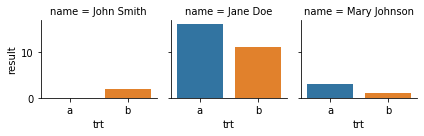

In [102]:
#seaborn functionality 

import seaborn as sns 

sns.catplot(x='trt', y='result', col='name',
            kind='bar', data=tidy1, height=2);
             #categorical plot

ASSIGNMENT 

In [95]:
table2 = table2.reset_index()
table2.head()

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [96]:
# table2 -> tidy
#MELT function go from WIDE to TIDY
#id_vars - where the unique identifier for each row is
#value_cars - where the numbers are (6 values
tidy2 = table2.melt(id_vars='index', value_vars=['John Smith', 'Jane Doe', 'Mary Johnson'])
tidy2.reindex()
tidy2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [97]:
#rename columns

tidy2 = tidy2.rename(columns={
    'index': 'trt',
    'variable': 'name',
    'value': 'result'
    })
tidy2

,trt,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [98]:
#replace the words treamtmenta and tretmentb with just a and b
tidy2.trt = tidy2.trt.str.replace('treatment', '')
tidy2

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


In [101]:
# tidy -> table2
#pivot table function

#TIDY => TABLE1
# index: unique indentifier
# columns: What do you want to differentiate the columns in wide format
# values: Where are the numbers at - go in the middile of the wide dataframe

wide_format= tidy2.pivot_table(index='trt', columns='name', values='result')
wide_format


name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


In [104]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [107]:
# Flights Pivot Table
pivot_flights = flights.pivot_table(index='year', columns='month', values='passengers')
pivot_flights



month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####